In [21]:
import csv, pandas as pd

Read data

In [41]:
file = 'C:\\Users\\vaibhav\\Documents\\UVA\\Summer\\Project\\Code\\Vaibhav\\HoneypotCSV\\2018-05-28-mhn.csv'

parse_dates = ['timestamp']
data = pd.read_csv(file, parse_dates=parse_dates)
pd.to_datetime(data['timestamp'], format='%Y-%b  %d %H:%M:%S')
print(data)

               timestamp              src  src_port protocol  \
0    2018-03-01 06:51:37   195.154.42.164     56738       ip   
1    2018-03-01 06:51:37   195.154.42.164     56738       ip   
2    2018-03-01 06:52:27     77.72.82.135     55905       ip   
3    2018-03-01 06:52:37   200.158.89.238     45858       ip   
4    2018-03-01 06:53:27  191.101.167.235     51020       ip   
5    2018-03-01 06:54:27    187.10.110.27     43434       ip   
6    2018-03-01 06:55:07   195.154.42.164     57133       ip   
7    2018-03-01 06:55:07   195.154.42.164     57133       ip   
8    2018-03-01 06:55:27  134.119.213.195      5304       ip   
9    2018-03-01 06:56:37     5.188.11.111     57580       ip   
10   2018-03-01 06:56:47    96.83.210.203     40470       ip   
11   2018-03-01 06:57:48      77.72.82.98     42023       ip   
12   2018-03-01 06:58:28   195.154.42.164     57527       ip   
13   2018-03-01 06:58:28   195.154.42.164     57527       ip   
14   2018-03-01 06:59:08       77.72.82.

Finding out unique sources

In [37]:
unique_src = data.src.unique()
print(len(unique_src))

451


In [ ]:
Unique ip sources frequency table

In [38]:
df = data.groupby('src').size().reset_index(name='Count').rename(columns={'src':'Unique src'}).sort_values('Count', ascending = False)
print(df)

          Unique src  Count
242   195.154.42.164    516
344    5.140.211.165    123
444    93.115.27.169     41
332      42.51.44.27     40
408      77.72.82.96     32
358       5.188.9.25     31
153    181.214.87.12     30
401     77.72.82.135     29
173  185.143.223.153     28
402     77.72.82.147     25
348     5.188.11.111     24
36    111.67.192.197     23
154    181.214.87.14     22
406      77.72.82.80     20
351      5.188.11.25     19
409      77.72.82.98     18
405       77.72.82.7     18
228  191.101.167.235     17
404      77.72.82.57     16
407      77.72.82.92     16
111   163.172.159.86     13
331    42.202.133.28     12
178   185.222.210.20     11
277     212.129.30.1     11
176   185.153.197.55      9
438    89.248.168.14      9
229  191.101.167.250      9
85   134.119.213.195      7
276   208.100.26.228      6
359      5.39.217.84      6
..               ...    ...
129   177.68.111.238      1
128   177.45.176.210      1
127   177.189.155.99      1
126  177.189.144.251

Top hitting app

In [48]:
df = data.groupby('app').size().reset_index(name='Count').rename(columns={'app':'Unique app'}).sort_values('Count', ascending = False)
print(df)

  Unique app  Count
1    dionaea   1614
0       amun    105


In [54]:
df = data.groupby('timestamp').size().reset_index(name='Count')
print(df)

               timestamp  Count
0    2018-03-01 06:51:37      2
1    2018-03-01 06:52:27      1
2    2018-03-01 06:52:37      1
3    2018-03-01 06:53:27      1
4    2018-03-01 06:54:27      1
5    2018-03-01 06:55:07      2
6    2018-03-01 06:55:27      1
7    2018-03-01 06:56:37      1
8    2018-03-01 06:56:47      1
9    2018-03-01 06:57:48      1
10   2018-03-01 06:58:28      2
11   2018-03-01 06:59:08      1
12   2018-03-01 06:59:18      1
13   2018-03-01 07:01:18      1
14   2018-03-01 07:01:38      2
15   2018-03-01 07:01:48      1
16   2018-03-01 07:02:58      1
17   2018-03-01 07:04:58      3
18   2018-03-01 07:07:28      1
19   2018-03-01 07:08:18      2
20   2018-03-01 07:08:28      2
21   2018-03-01 07:08:48      2
22   2018-03-01 07:09:48      1
23   2018-03-01 07:11:38      2
24   2018-03-01 07:11:48      1
25   2018-03-01 07:12:18      1
26   2018-03-01 07:13:08      1
27   2018-03-01 07:13:38      1
28   2018-03-01 07:14:48      2
29   2018-03-01 07:17:49      1
...     

In [56]:
time_series = data.groupby(df.timestamp.dt.hour).size().reset_index(name='Count').rename(columns={'timestamp':'Hour'})
print(time_series)

    Hour  Count
0    6.0     13
1    7.0     67
2    8.0     66
3    9.0     90
4   10.0     81
5   11.0     83
6   12.0     84
7   13.0     80
8   14.0     83
9   15.0     81
10  16.0     84
11  17.0     89
12  18.0     83
13  19.0     95
14  20.0     20


Bar chart of time stamp count

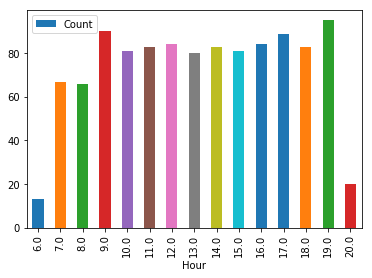

In [60]:
time_series.plot(kind='bar', x = 'Hour', y = 'Count')
